In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [277]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [278]:
df.shape

(5110, 12)

<AxesSubplot:xlabel='gender', ylabel='count'>

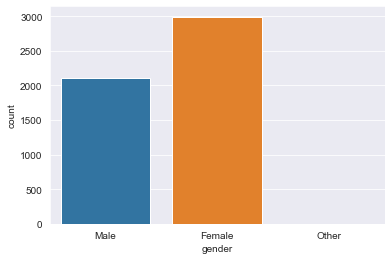

In [279]:
sns.countplot(x = 'gender', data = df)

In [280]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [281]:
df['heart_disease'].value_counts()


0    4834
1     276
Name: heart_disease, dtype: int64

In [282]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

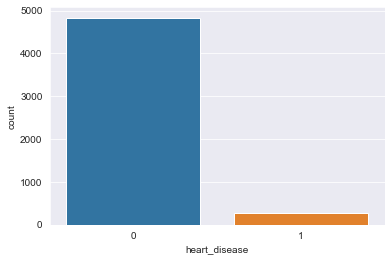

In [283]:
sns.countplot(x = 'heart_disease', data = df)

In [284]:
df.drop(['work_type','Residence_type','id','ever_married'], axis=1, inplace=True)

In [285]:
df.shape

(5110, 8)

In [286]:
df.head(2)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,202.21,NaN,never smoked,1


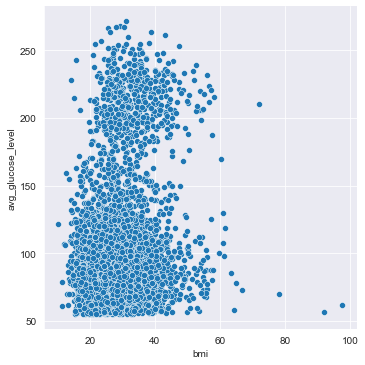

In [287]:
sns.relplot(x='bmi', y='avg_glucose_level', data=df)

In [288]:
df['bmi'].isnull().value_counts()


False    4909
True      201
Name: bmi, dtype: int64

In [289]:
df['bmi'].var()

61.68636419426877

In [290]:
mean_bmi=df['bmi'].mean()
df['bmi_mean']=df['bmi'].fillna(mean_bmi)
median_bmi=df['bmi'].median()
df['bmi_median']=df['bmi'].fillna(median_bmi)

In [291]:
df


,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,bmi_mean,bmi_median
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1,36.600000,36.6
1,Female,61.0,0,0,202.21,NaN,never smoked,1,28.893237,28.1
2,Male,80.0,0,1,105.92,32.5,never smoked,1,32.500000,32.5
3,Female,49.0,0,0,171.23,34.4,smokes,1,34.400000,34.4
4,Female,79.0,1,0,174.12,24.0,never smoked,1,24.000000,24.0
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,83.75,NaN,never smoked,0,28.893237,28.1
5106,Female,81.0,0,0,125.20,40.0,never smoked,0,40.000000,40.0
5107,Female,35.0,0,0,82.99,30.6,never smoked,0,30.600000,30.6
5108,Male,51.0,0,0,166.29,25.6,formerly smoked,0,25.600000,25.6


In [292]:
df['bmi_mean'].var()

59.25947846260935

In [293]:
df['bmi_median'].var()

59.28325990089285

<AxesSubplot:ylabel='Density'>

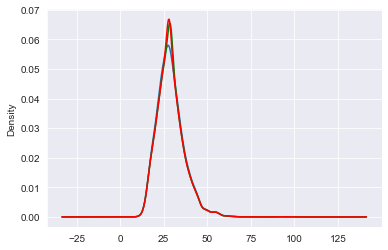

In [294]:
df['bmi'].plot(kind='kde')
df['bmi_mean'].plot(kind='kde', color='green')
df['bmi_median'].plot(kind='kde', color='red')

In [295]:
df.cov()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_mean,bmi_median
age,511.331792,1.853816,1.348494,243.882731,59.061247,1.194146,56.737640,56.462308
hypertension,1.853816,0.087976,0.007262,2.343429,0.380736,0.008169,0.365757,0.361501
heart_disease,1.348494,0.007262,0.051104,1.656923,0.070465,0.006567,0.067693,0.064255
avg_glucose_level,243.882731,2.343429,1.656923,2050.600820,61.234769,1.286527,58.825650,58.183489
bmi,59.061247,0.380736,0.070465,61.234769,61.686364,0.067199,61.686364,61.686364
stroke,1.194146,0.008169,0.006567,1.286527,0.067199,0.046363,0.064555,0.059866
bmi_mean,56.737640,0.365757,0.067693,58.825650,61.686364,0.064555,59.259478,59.259478
bmi_median,56.462308,0.361501,0.064255,58.183489,61.686364,0.059866,59.259478,59.283260


<AxesSubplot:>

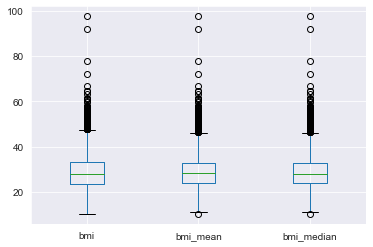

In [296]:
df[['bmi','bmi_mean','bmi_median']].boxplot()

In [297]:
df['bmi']=df['bmi_mean']

In [298]:
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,bmi_mean,bmi_median
0,Male,67.0,0,1,228.69,36.600000,formerly smoked,1,36.600000,36.6
1,Female,61.0,0,0,202.21,28.893237,never smoked,1,28.893237,28.1
2,Male,80.0,0,1,105.92,32.500000,never smoked,1,32.500000,32.5
3,Female,49.0,0,0,171.23,34.400000,smokes,1,34.400000,34.4
4,Female,79.0,1,0,174.12,24.000000,never smoked,1,24.000000,24.0
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,83.75,28.893237,never smoked,0,28.893237,28.1
5106,Female,81.0,0,0,125.20,40.000000,never smoked,0,40.000000,40.0
5107,Female,35.0,0,0,82.99,30.600000,never smoked,0,30.600000,30.6
5108,Male,51.0,0,0,166.29,25.600000,formerly smoked,0,25.600000,25.6


In [299]:
df.drop(['bmi_mean','bmi_median'], axis=1,inplace=True)

In [300]:
df.head(2)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,202.21,28.893237,never smoked,1


In [301]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [302]:
df[df['gender']=='Other']

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,143.33,22.4,formerly smoked,0


In [303]:
df.drop([3116], axis=0, inplace=True)

In [304]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [305]:
df.shape

(5109, 8)

<AxesSubplot:xlabel='stroke', ylabel='count'>

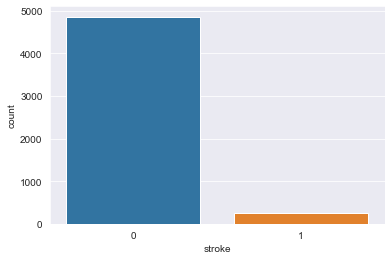

In [306]:
sns.set_style('darkgrid')
sns.countplot(x = 'stroke', data = df)

In [307]:
df['stroke'].value_counts()


0    4860
1     249
Name: stroke, dtype: int64

In [308]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [309]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [310]:
gender_mapping = {'Male': 1, 'Female': 2}
df['gender'] = df['gender'].replace(gender_mapping)
smoking_status_mapping = {'never smoked':1, 'formerly smoked':2, 'smokes':3, 'Unknown':4 }
df['smoking_status'] = df['smoking_status'].replace(smoking_status_mapping)

In [311]:
df['gender'].value_counts()

2    2994
1    2115
Name: gender, dtype: int64

In [312]:
df['smoking_status'].value_counts()

1    1892
4    1544
2     884
3     789
Name: smoking_status, dtype: int64

In [313]:
df['gender'].value_counts()

2    2994
1    2115
Name: gender, dtype: int64

In [314]:
df.head(3)

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.600000,2,1
1,2,61.0,0,0,202.21,28.893237,1,1
2,1,80.0,0,1,105.92,32.500000,1,1


In [315]:
df.corr()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,0.027752,-0.021223,-0.085685,-0.054722,0.025606,-0.084738,-0.009081
age,0.027752,1.000000,0.276367,0.263777,0.238323,0.325858,-0.300994,0.245239
hypertension,-0.021223,0.276367,1.000000,0.108292,0.174540,0.160147,-0.119331,0.127891
heart_disease,-0.085685,0.263777,0.108292,1.000000,0.161907,0.038862,-0.027691,0.134905
avg_glucose_level,-0.054722,0.238323,0.174540,0.161907,1.000000,0.168910,-0.073508,0.131991
bmi,0.025606,0.325858,0.160147,0.038862,0.168910,1.000000,-0.209698,0.038912
smoking_status,-0.084738,-0.300994,-0.119331,-0.027691,-0.073508,-0.209698,1.000000,-0.036667
stroke,-0.009081,0.245239,0.127891,0.134905,0.131991,0.038912,-0.036667,1.000000


<AxesSubplot:>

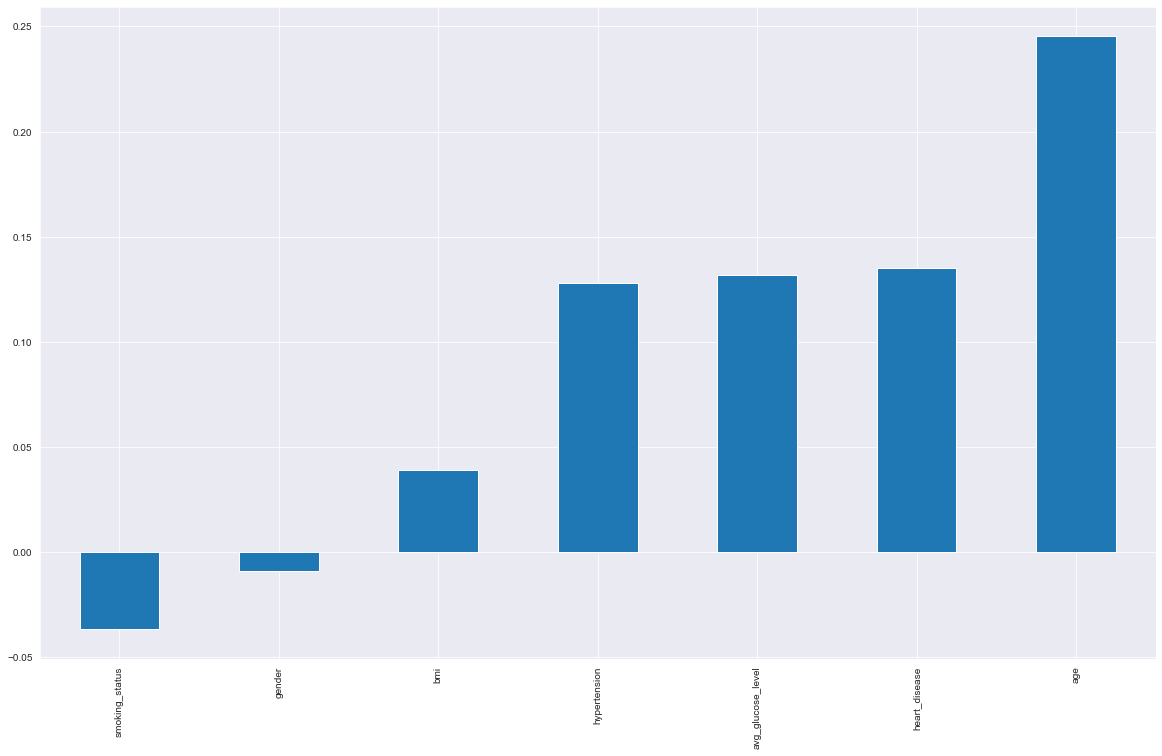

In [316]:
plt.figure(figsize=(20, 12))
df.corr()['stroke'].sort_values()[:-1].plot(kind = 'bar')

In [317]:
df.shape

(5109, 8)

In [318]:
X = df.drop('stroke', axis = 1).values
y = df['stroke'].values
X.shape

(5109, 7)

In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [320]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
model_lgr = 'Logistic Regression'
lr = LogisticRegression()

In [321]:
model = lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [322]:
lr_predict=lr.predict(X_test)

In [323]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)

In [324]:
lr_acc_score = accuracy_score(y_test, lr_predict)

In [325]:
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_predict))

confussion matrix
[[1615    0]
 [  71    0]]
-------------------------------------------
Accuracy of Logistic Regression: 95.7888493475682 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1615
           1       0.00      0.00      0.00        71

    accuracy                           0.96      1686
   macro avg       0.48      0.50      0.49      1686
weighted avg       0.92      0.96      0.94      1686



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [326]:
import pickle

In [327]:
pickle.dump(model, open('stroke.pkl', 'wb'))

In [328]:
loadedModel = pickle.load(open('stroke.pkl', 'rb'))

In [329]:
loadedModel

LogisticRegression()

In [331]:
loadedModel.predict([[0,69,1,1,228.69,36.600000,1]])

array([0], dtype=int64)